# Assignment 7 (Week 7)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
```

## Name: Faiza Yusuf

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [90]:
# Built-in library
import itertools

# Standard imports
import numpy as np
import pandas as pd


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

from typing import Union


# Black code formatter (Optional)
#%load_ext nb_black

# auto reload imports
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

> The data can be found [here](https://drive.google.com/file/d/1_c3KA14xQC02K0QZ4cpi1emjdz0rqHzb/view?usp=share_link).

### Data Dictionary

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary: 
```

### Objective

```
Predict whether a person makes over 50K a year.

```



###  Qs 1. Build a machine learning model that predicts the salary.

###  Qs 2. Evaluate the performance of your model using at least three (3) performance metrics.

<hr>

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

In [141]:
# get the data
df = pd.read_csv("salary.csv")
df.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [142]:
# check the shape
df.shape

(32560, 15)

In [143]:
# decription of the data
df.describe()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [144]:
# check for duplicate values
df.duplicated().sum()

24

In [145]:
(df.duplicated().sum() / df.shape[0]) * 100

0.07371007371007371

#### Comment
About 0.07 percent of the observations are duplicate, I will drop the rows

In [146]:
# check for emty cells
df.isnull().sum()

Age               0
Workclass         0
Final_weight      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Salary            0
dtype: int64

In [147]:
# checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Final_weight    32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Country         32560 non-null  object
 14  Salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [148]:
# dividing the data into numerical and categorical variable
cat_data, num_data = df.select_dtypes(include="O"), df.select_dtypes(exclude="O")

### Exploring the numerical columns

In [149]:
num_data.head()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [150]:
# checking for the number of unique
for i in num_data.columns:
    print({i: num_data[i].nunique()})

{'Age': 73}
{'Final_weight': 21647}
{'Education_num': 16}
{'Capital_gain': 119}
{'Capital_loss': 92}
{'Hours_per_week': 94}


In [19]:
# calling the ggplot style for the plotting style
plt.style.use("ggplot")

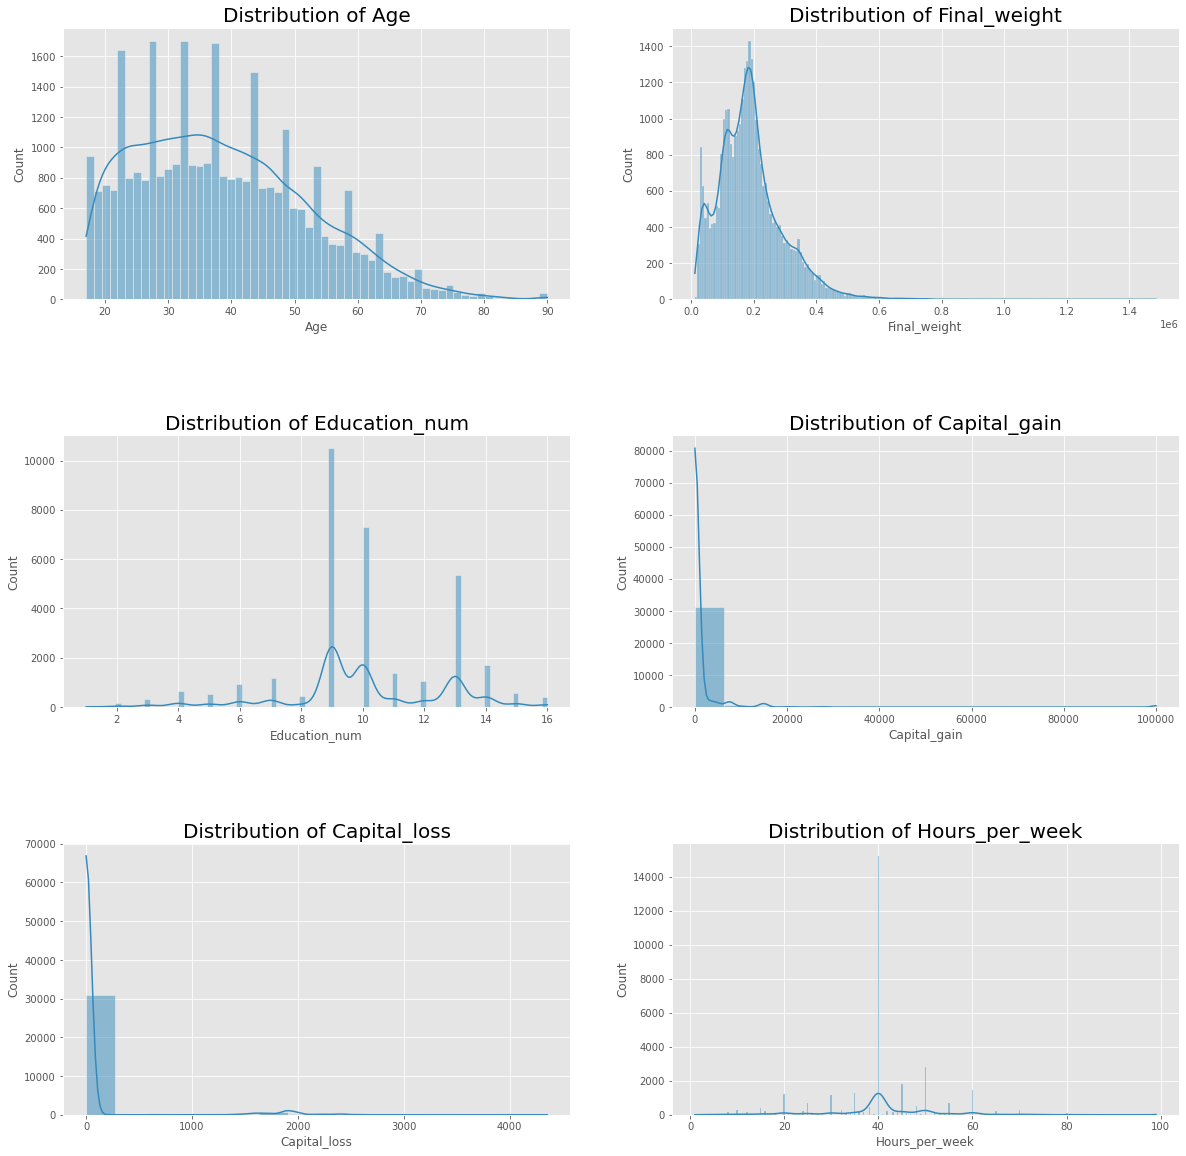

In [151]:
# checking for the distribution

nrows, ncols = 3, 2
figsize = (20, 20)
fig, axs = plt.subplots(nrows, ncols, figsize=figsize)
feat = num_data.columns
for idx, val in enumerate(feat):
    if nrows > 1:
        ax = axs[(idx // ncols), (idx % ncols)]
    else:
        ax = axs[idx]

    sns.histplot(x=val, data=num_data, ax=ax, kde=True)
    ax.set_title(f"Distribution of {val}", size=20)
    plt.subplots_adjust(hspace=0.5)

### Comment
* Education num variable looks descrete and has rare label
* Both The final weight and Education variables are not normally ditributed

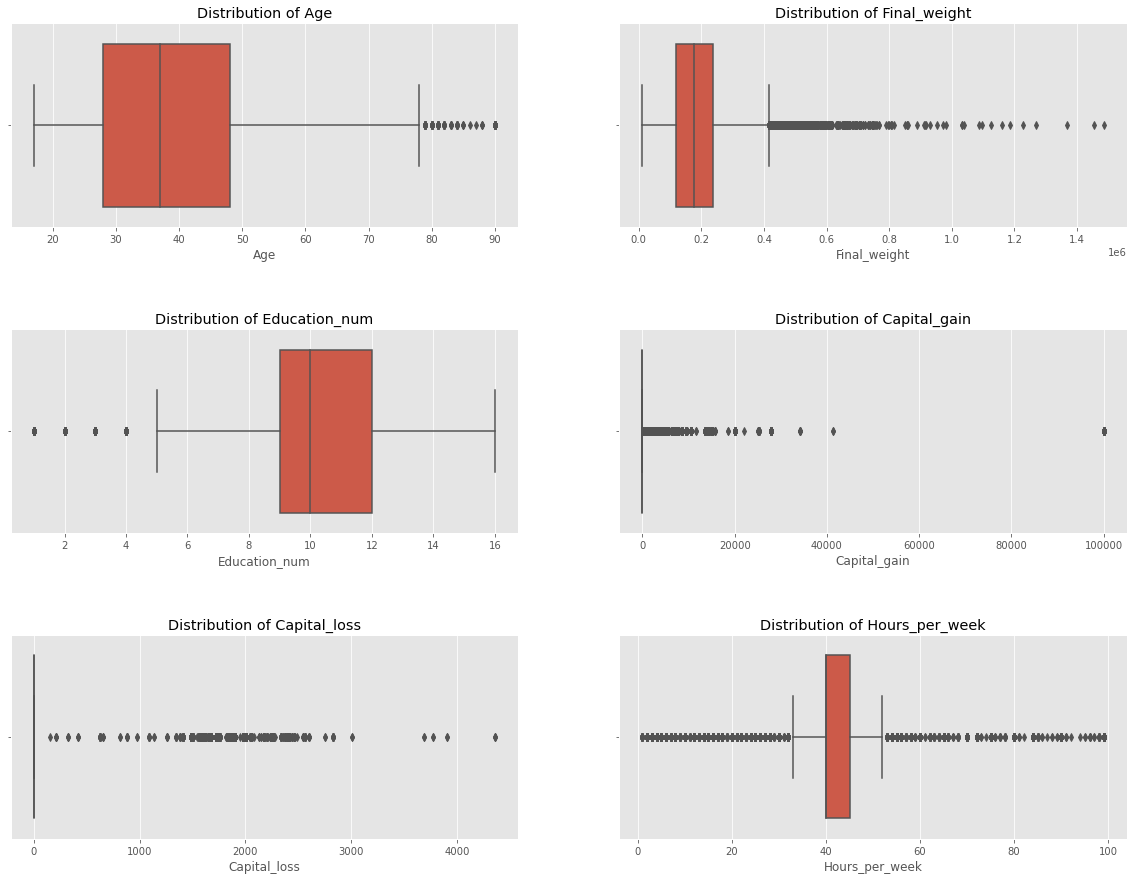

In [21]:
# checking for outliers

nrows, ncols = 3, 2
figsize = (20, 15)
fig, axs = plt.subplots(nrows, ncols, figsize=figsize)
feat = num_data.columns
for idx, val in enumerate(feat):
    if nrows > 1:
        ax = axs[(idx // ncols), (idx % ncols)]
    else:
        ax = axs[idx]

    sns.boxplot(x=val, data=num_data, ax=ax)
    ax.set_title(f"Distribution of {val}")
    plt.subplots_adjust(hspace=0.5)

### Comment
* There are too many outliers in final weight, and hours per week variables
* I will descritize the age and final weight, variables and hours per week.
* I will drop capital gain and capital loss because ideally they are not related to salary prediction 
* For the Education_num, i will combine 2 to 6 as single label, and 12 to 18 to single label, i will leave 9 as it is 


### Exploring the categorical variable

In [152]:
cat_data.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Country,Salary
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [153]:
# checking the number of unique for the categorical variable
for i in cat_data.columns:
    print({i: cat_data[i].nunique()})

{'Workclass': 9}
{'Education': 16}
{'Marital_status': 7}
{'Occupation': 15}
{'Relationship': 6}
{'Race': 5}
{'Sex': 2}
{'Country': 42}
{'Salary': 2}


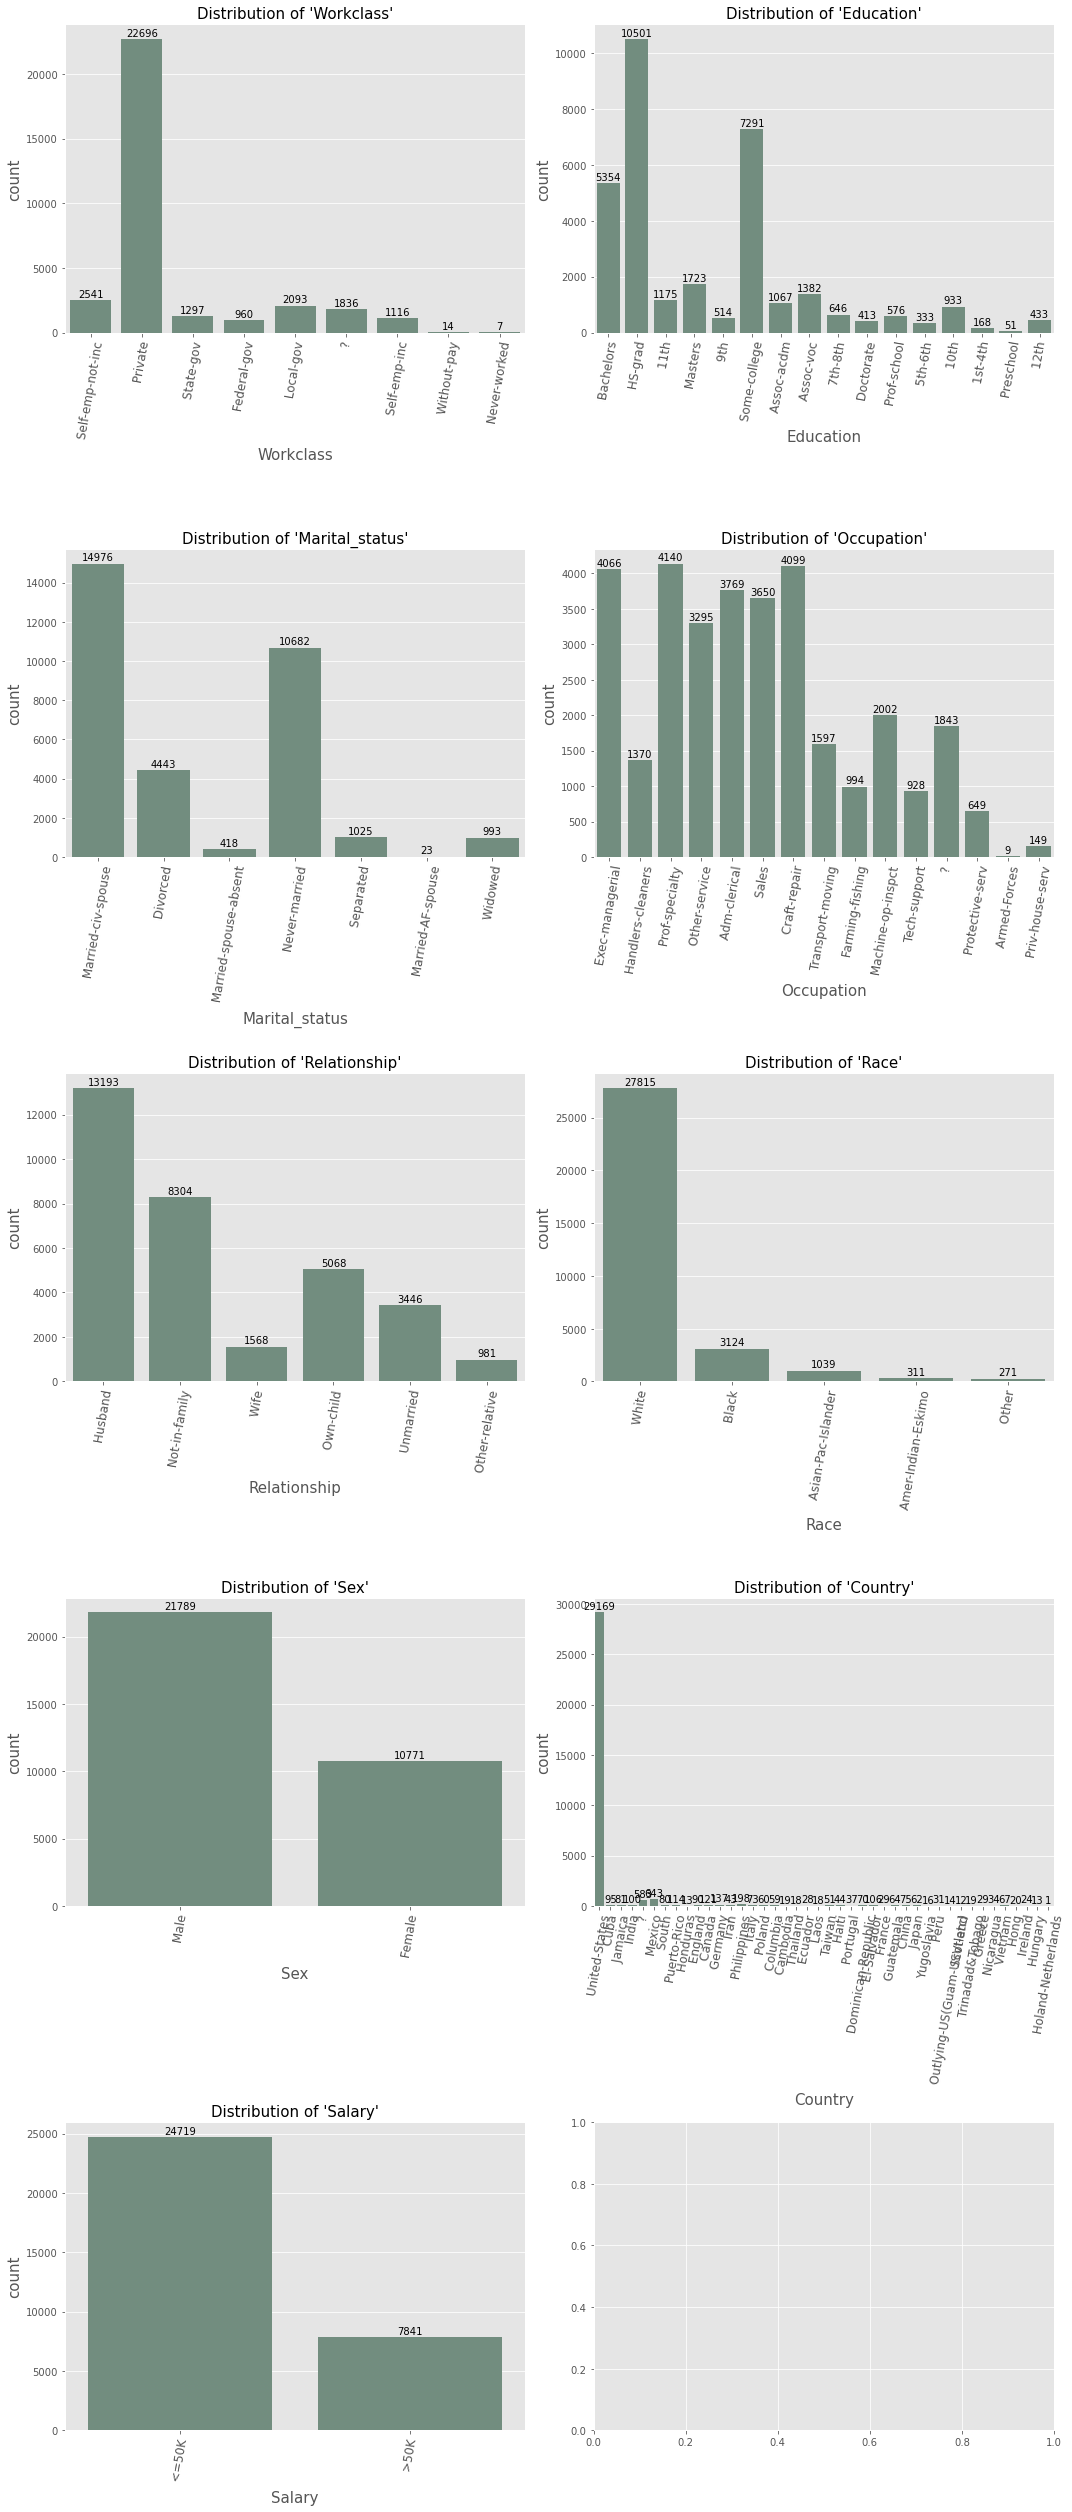

In [154]:
# importing the count plotfrom preprocessing module
from preprocessing import count_plot

count_plot(
    df=cat_data,
    columns=cat_data.columns,
    ncols=2,
    nrows=5,
    rotation=80,
    figsize=(15, 35),
)

#### Comment
* I will encode the salary to 1 and 2, from <=50k, and >50k respectively
* Occupation and work class variable has a label "?"  i will replace the values with the mode
* The country variable has many unique values and also united state has 91 percent of the value, so will drop the column
* I will combine without_pay and never_worked as others in the work class variable
* for occupation variable i will join armed forced to protective services
 

## FEATURE ENGINEERING

* Dropping dulpicated observation
* Droping capital loss, capital gain and country
* Renaming the salary column
* replace variable with ? with mode of the variable
* Descritizing the age, final weight, haurs per week and education number variables 
* replace without_pay, never_pay labels to others in workclass variable 
* replace Armed-Forces label to protective service label in occupation variable
* replace Married-AF-spouse to Married-civ-spouse in the occupation variable 


### I will use pipeline for the preprocessing and modelling which are stored in the preprocessing and pipeline_model module

In [121]:
# getting the data
data = pd.read_csv("salary.csv")

print(data.shape)
data.head(1)


(32560, 15)


,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [119]:
## initializing constant
RANDOM_STATE = 123
TEST_SIZE = 0.2
TARGET = "Salary"

#### splitting the data

In [122]:
# splitting data
from sklearn.model_selection import train_test_split

# encoding target variable
mapper = {" <=50K": 1, " >50K": 2}
data["Salary"] = data["Salary"].map(mapper)

# dropping duplicate values
data.duplicated().sum()

# getting the feature variable
X = data.drop(columns=[TARGET])

# getting the target
y = data[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((26048, 14), (6512, 14))

#### I will predict using Decision tree, Random forest, and logistic regression

### DECISION TREE

In [160]:
# importing the pipeline
from pipeline_model import decision_tree_pipe

# the pipeline
decision_tree_pipe

Pipeline(steps=[('drop_columns',
                 DropColumns(features=['Capital_gain', 'Capital_loss',
                                       'Country'])),
                ('replace_question_mark', ReplaceQuestionMark()),
                ('discritize_age',
                 Discretize(bins=4, labels=False, variable='Age')),
                ('discritize_final_weight',
                 Discretize(bins=4, labels=False, variable='Final_weight')),
                ('discritize_hours_per_week',
                 Discretize(bins=4, labels=F...
                               variable='Occupation')),
                ('replacing_work_class',
                 ReplaceValues(replace=' Others',
                               search=[' Never-worked', ' Without-pay'],
                               variable='Workclass')),
                ('replacing_marital_status',
                 ReplaceValues(replace=' Married-civ-spouse',
                               search=[' Married-AF-spouse'],
                               variable='Marital_status')),
                ('Ohe', CustomOneHotEncoder()),
                ('Dicision tree', DecisionTreeClassifier(random_state=123))])

In [161]:
# Fit
decision_tree_pipe.fit(X_train, y_train)

# Make predictions
y_pred_1 = decision_tree_pipe.predict(X_test)

# evalute the performance
clf_report = metrics.classification_report(y_true=y_test, y_pred=y_pred_1)

print(clf_report)


              precision    recall  f1-score   support

           1       0.84      0.88      0.86      4970
           2       0.54      0.47      0.50      1542

    accuracy                           0.78      6512
   macro avg       0.69      0.67      0.68      6512
weighted avg       0.77      0.78      0.77      6512



### LOGISTIC REGRESSION

In [163]:
# import the pipeline
from pipeline_model import logistic_pipe

# display the pipeline
logistic_pipe

Pipeline(steps=[('drop_columns',
                 DropColumns(features=['Capital_gain', 'Capital_loss',
                                       'Country'])),
                ('replace_question_mark', ReplaceQuestionMark()),
                ('discritize_age',
                 Discretize(bins=4, labels=False, variable='Age')),
                ('discritize_final_weight',
                 Discretize(bins=4, labels=False, variable='Final_weight')),
                ('discritize_hours_per_week',
                 Discretize(bins=4, labels=F...
                ('replacing_work_class',
                 ReplaceValues(replace=' Others',
                               search=[' Never-worked', ' Without-pay'],
                               variable='Workclass')),
                ('replacing_marital_status',
                 ReplaceValues(replace=' Married-civ-spouse',
                               search=[' Married-AF-spouse'],
                               variable='Marital_status')),
                ('Ohe', CustomOneHotEncoder()), ('scale', StandardScaler()),
                ('Dicision tree', LogisticRegression(random_state=123))])

In [164]:
# Fit
logistic_pipe.fit(X_train, y_train)

# Make predictions
y_pred_2 = logistic_pipe.predict(X_test)

# evaluate the performance
clf_report = metrics.classification_report(y_true=y_test, y_pred=y_pred_2)

print(clf_report)

              precision    recall  f1-score   support

           1       0.87      0.92      0.89      4970
           2       0.68      0.57      0.62      1542

    accuracy                           0.84      6512
   macro avg       0.78      0.74      0.76      6512
weighted avg       0.83      0.84      0.83      6512



### RANDOM FOREST

In [165]:
# import the pipeline
from pipeline_model import random_forest_pipe

# display the pipeline
random_forest_pipe

Pipeline(steps=[('drop_columns',
                 DropColumns(features=['Capital_gain', 'Capital_loss',
                                       'Country'])),
                ('replace_question_mark', ReplaceQuestionMark()),
                ('discritize_age',
                 Discretize(bins=4, labels=False, variable='Age')),
                ('discritize_final_weight',
                 Discretize(bins=4, labels=False, variable='Final_weight')),
                ('discritize_hours_per_week',
                 Discretize(bins=4, labels=F...
                ('replacing_work_class',
                 ReplaceValues(replace=' Others',
                               search=[' Never-worked', ' Without-pay'],
                               variable='Workclass')),
                ('replacing_marital_status',
                 ReplaceValues(replace=' Married-civ-spouse',
                               search=[' Married-AF-spouse'],
                               variable='Marital_status')),
                ('Ohe', CustomOneHotEncoder()), ('scale', MinMaxScaler()),
                ('Dicision tree', RandomForestClassifier(random_state=123))])

In [166]:
# Fit
decision_tree_pipe.fit(X_train, y_train)

# Make predictions
y_pred_1 = decision_tree_pipe.predict(X_test)

# evaluate the performane
clf_report = metrics.classification_report(y_true=y_test, y_pred=y_pred_1)

print(clf_report)

              precision    recall  f1-score   support

           1       0.84      0.88      0.86      4970
           2       0.54      0.47      0.50      1542

    accuracy                           0.78      6512
   macro avg       0.69      0.67      0.68      6512
weighted avg       0.77      0.78      0.77      6512



In [71]:
# pobability of the the target variable
y_test.value_counts(normalize=True)

1    0.763206
2    0.236794
Name: Salary, dtype: float64

## Conclusion

After the preprocessing and prediction using three algorithm, prediction with logistic regression has heigher accuracy